# Setup

In [2]:
DATA_FILE_NAME = "consultation-documents-preprocessed-2024-11-26.parquet"
LANGUAGES = {
    "de",
    # "fr",
    # "it",
}

In [3]:
import os
import pathlib

import boto3
import dotenv
import pandas as pd

In [4]:
dotenv.load_dotenv()

True

## Ensure the data file is available locally

In [5]:
REPOSITORY_ROOT = (pathlib.Path().cwd() / ".." / "..").resolve()
PREPROCESSED_DATA_FILE = REPOSITORY_ROOT / "data" / "dataframes" / DATA_FILE_NAME

In [6]:
if PREPROCESSED_DATA_FILE.exists():
    print(f"File {PREPROCESSED_DATA_FILE} already exists locally.")
else:
    s3 = boto3.client(
        "s3",
        aws_access_key_id=os.environ["EXOSCALE_SOS_ACCESS_KEY"],
        aws_secret_access_key=os.environ["EXOSCALE_SOS_SECRET_KEY"],
        endpoint_url=os.environ["EXOSCALE_SOS_ENDPOINT"],
    )
    bucket_name = "demokratis-ml"
    source_path = pathlib.Path("dataframes") / DATA_FILE_NAME
    PREPROCESSED_DATA_FILE.parent.mkdir(parents=True, exist_ok=True)
    print(f"Downloading {source_path}\n from {bucket_name}\n to {PREPROCESSED_DATA_FILE}")
    s3.download_file(bucket_name, str(source_path), PREPROCESSED_DATA_FILE)

File /Users/vita/Code/demokratis/demokratis-ml/data/dataframes/consultation-documents-preprocessed-2024-11-26.parquet already exists locally.


## Load data

In [7]:
df_docs = pd.read_parquet(PREPROCESSED_DATA_FILE)
df_docs = df_docs[df_docs["document_language"].isin(LANGUAGES)]
df_docs

,document_id,consultation_id,consultation_start_date,consultation_end_date,consultation_title,consultation_description,document_source_url,consultation_url,consultation_topics,document_type,document_language,document_title,organisation_id,organisation_name,political_body,consultation_reviewed_at,document_source,consultation_topics_label_source,document_content_plain
0,1,1,2021-10-01,2022-01-17,Verordnung des BAZG über die Bekämpfung von G...,Mit der am 19. März 2021 durch das Parlament b...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]",DRAFT,de,Vernehmlassungsvorlage,41,Bundesamt für Zoll und Grenzsicherheit,ch,2024-11-04 15:11:24,fedlex,manual,«$$e-seal» \n«$$QrCode» \n \n2021-… \n«%ASFF_Y...
3,4,1,2021-10-01,2022-01-17,Verordnung des BAZG über die Bekämpfung von G...,Mit der am 19. März 2021 durch das Parlament b...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]",RECIPIENT_LIST,de,Adressatenliste,41,Bundesamt für Zoll und Grenzsicherheit,ch,2024-11-04 15:11:24,fedlex,manual,Eidgenössisches Finanzdepartement EFD \nEidgen...
6,7,1,2021-10-01,2022-01-17,Verordnung des BAZG über die Bekämpfung von G...,Mit der am 19. März 2021 durch das Parlament b...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]",LETTER,de,Begleitschreiben 2,41,Bundesamt für Zoll und Grenzsicherheit,ch,2024-11-04 15:11:24,fedlex,manual,Eidgenössisches Finanzdepartement EFD \nEidgen...
9,10,1,2021-10-01,2022-01-17,Verordnung des BAZG über die Bekämpfung von G...,Mit der am 19. März 2021 durch das Parlament b...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]",REPORT,de,Erläuternder Bericht,41,Bundesamt für Zoll und Grenzsicherheit,ch,2024-11-04 15:11:24,fedlex,manual,1. Oktober 2021 \n \n \n \n \nVerordnung des B...
12,13,1,2021-10-01,2022-01-17,Verordnung des BAZG über die Bekämpfung von G...,Mit der am 19. März 2021 durch das Parlament b...,https://fedlex.data.admin.ch/filestore/fedlex....,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]",LETTER,de,Begleitschreiben 1,41,Bundesamt für Zoll und Grenzsicherheit,ch,2024-11-04 15:11:24,fedlex,manual,Eidgenössisches Finanzdepartement EFD \nEidgen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52032,53162,4958,2024-11-21,2025-02-28,Glarner Spitalplanung 2026,,https://www.gl.ch/public/upload/assets/57957/A...,https://www.demokratis.ch/vernehmlassung/a4n88vs7,[],VARIOUS_TEXT,de,Anforderungen an Listenspitäler Akutsomatik un...,149,Regierungsrat des Kantons Glarus,gl,NaT,openparldata,openparldata,Telefon 055 646 60 11/12/15 \nE-Mail: staats...
52036,53166,4671,2023-10-27,2024-01-31,"Änderung des Strassengesetzes, Umsetzung der M...",,https://www.notes.zh.ch/sk/VNL/vnl.nsf/vw-alld...,https://www.demokratis.ch/vernehmlassung/m22stj27,"[spatial_planning, transportation]",DECISION,de,Beschluss des Kantonsrates,166,Regierungsrat des Kantons Zürich,zh,NaT,openparldata,openparldata,1\nAntrag des Regierungsrates vom 21. August 2...
52037,53167,4671,2023-10-27,2024-01-31,"Änderung des Strassengesetzes, Umsetzung der M...",,https://www.notes.zh.ch/sk/VNL/vnl.nsf/vw-alld...,https://www.demokratis.ch/vernehmlassung/m22stj27,"[spatial_planning, transportation]",FINAL_REPORT,de,Zusammenstellung des Vernehmlassungsergebnisses,166,Regierungsrat des Kantons Zürich,zh,NaT,openparldata,openparldata,\n20240419_Uferwege_Zusammenstellung des Vern...
52038,53168,4672,2023-10-27,2024-01-31,"Änderung des Strassengesetzes, Umsetzung der M...",,https://www.notes.zh.ch/sk/VNL/vnl.nsf/vw-alld...,https://www.demokratis.ch/vernehmlassung/2s2s3r2u,"[finance, spatial_planning]",DECISION,de,Beschluss des Kantonsrates,166,Regi

## Group by consultations

In [8]:
df_consultations = df_docs.groupby("consultation_id").agg(
    {
        col: "first"
        for col in (
            # "document_id",
            # "consultation_id",
            "consultation_start_date",
            "consultation_end_date",
            "consultation_title",
            "consultation_description",
            # "document_source_url",
            "consultation_url",
            "consultation_topics",
            # "document_type",
            # "document_language",
            # "document_title",
            "organisation_id",
            "organisation_name",
            "political_body",
            "consultation_reviewed_at",
            "document_source",
            "consultation_topics_label_source",
            # "document_content_plain",
        )
    }
)
df_consultations

,consultation_start_date,consultation_end_date,consultation_title,consultation_description,consultation_url,consultation_topics,organisation_id,organisation_name,political_body,consultation_reviewed_at,document_source,consultation_topics_label_source
consultation_id,,,,,,,,,,,,
1,2021-10-01,2022-01-17,Verordnung des BAZG über die Bekämpfung von G...,Mit der am 19. März 2021 durch das Parlament b...,https://www.demokratis.ch/vernehmlassung/7bt3hz2w,"[administration, finance, security]",41,Bundesamt für Zoll und Grenzsicherheit,ch,2024-11-04 15:11:24,fedlex,manual
2,2021-12-03,2022-03-18,Änderung der Verordnung über Fernmeldedienste ...,In Vollzug von Artikel 48a FMG über die Sicher...,https://www.demokratis.ch/vernehmlassung/a49pncfq,[communications],38,Bundesamt für Kommunikation,ch,NaT,fedlex,organisation_rule
3,2021-10-11,2022-01-25,"Teilrevisionen der Raumplanungsverordnung, der...","Das Eidgenössische Departement für Umwelt, Ver...",https://www.demokratis.ch/vernehmlassung/tcspwfam,[energy],44,Bundesamt für Energie,ch,NaT,fedlex,organisation_rule
4,2021-11-24,2022-03-10,Szenariorahmen 2030/2040 für die Stromnetzplanung,Der energiewirtschaftliche Szenariorahmen stel...,https://www.demokratis.ch/vernehmlassung/y9vpep78,[energy],44,Bundesamt für Energie,ch,NaT,fedlex,organisation_rule
5,2021-12-10,2022-03-24,Änderung des Bundesgesetzes über Förderung von...,Als eine Massnahme des am 1. September 2021 vo...,https://www.demokratis.ch/vernehmlassung/x7985bkz,[economics],90,Staatssekretariat für Wirtschaft,ch,NaT,fedlex,organisation_rule
...,...,...,...,...,...,...,...,...,...,...,...,...
4954,2024-11-15,2025-02-17,Steuerrabatt bei Überschüssen und guter Finanz...,Mit einer Änderung des Steuergesetzes soll der...,https://www.demokratis.ch/vernehmlassung/sv5fmkbc,"[economics, public_finance]",141,Regierungsrat des Kantons Aargau,ag,2024-11-19 13:45:25,openparldata,manual
4955,2024-11-15,2025-03-10,Mehrwertabgabe geht in die Vernehmlassung,Der Regierungsrat des Kantons Thurgau hat die ...,https://www.demokratis.ch/vernehmlassung/ce6h8xnc,"[housing, public_finance, spatial_planning]",160,Regierungsrat des Kantons Thurgau,tg,2024-11-19 13:52:00,openparldata,manual
4956,2024-11-21,2025-03-14,Parlamentarische Initiative. Armut ist kein Ve...,"Die Kommission schlägt vor, das Ausländer- und...",https://www.demokratis.ch/vernehmlassung/8vzwky3r,"[law, migration, social]",86,Parlamentsdienste,ch,2024-11-21 13:37:26,fedlex,manual


# Topic label exploration

In [9]:
def value_counts(data: pd.Series) -> pd.DataFrame:
    """Do the standard value_counts but also add a percentage column."""
    counts = data.value_counts()
    return pd.DataFrame({counts.name: counts, "%": (100 * counts / counts.sum()).round(2)})

## Document (consultation) sources

In [10]:
value_counts(df_consultations["document_source"])

,count,%
document_source,,
openparldata,2131,51.59
fedlex,2000,48.41


## Topic label sources

In [11]:
value_counts(df_consultations["consultation_topics_label_source"])

,count,%
consultation_topics_label_source,,
openparldata,1876,45.41
organisation_rule,1626,39.36
manual,629,15.23


In [24]:
df_consultations["consultation_topics_label_source"].value_counts(normalize=True)

consultation_topics_label_source
openparldata         0.454127
organisation_rule    0.393609
manual               0.152263
Name: proportion, dtype: float64

## Topic frequencies

In [23]:
data = df_consultations.explode("consultation_topics")["consultation_topics"]
counts = data.value_counts()
pd.DataFrame({counts.name: counts, "%": (100 * counts / len(df_consultations)).round(2)})

,count,%
consultation_topics,,
economics,855,20.70
law,635,15.37
finance,634,15.35
health,572,13.85
security,427,10.34
spatial_planning,406,9.83
social,399,9.66
transportation,382,9.25
environment,364,8.81


Top label combinations:

In [26]:
N = None
with pd.option_context("display.max_rows", N):
    display(value_counts(df_consultations["consultation_topics"].map(frozenset)).head(N))

,count,%
consultation_topics,,
(law),327,7.92
(health),276,6.68
(finance),205,4.96
(economics),191,4.62
(transportation),187,4.53
(environment),143,3.46
"(finance, economics)",117,2.83
(energy),117,2.83
(spatial_planning),115,2.78


<Axes: title={'center': 'Number of topics per consultation'}, xlabel='len(consultation_topics)'>

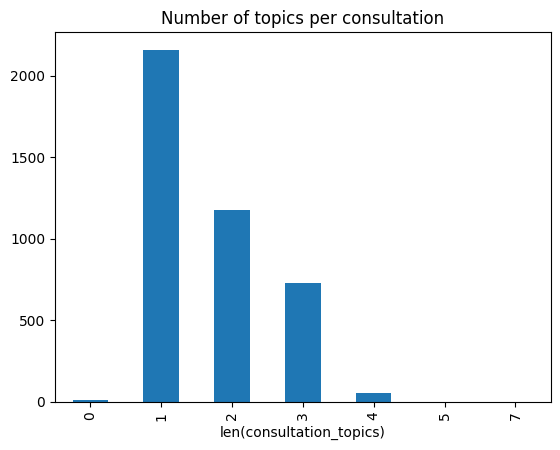

In [28]:
df_consultations["consultation_topics"].apply(len).value_counts().sort_index().plot.bar(
    title="Number of topics per consultation",
    xlabel="len(consultation_topics)",
)